# IMPORT LIBRARIES

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# TASK 1

## Take the “box color.jpg” image from the dataset and segregate the color image into 3 channels and save the channels separately.


In [5]:
cl_img1 = cv2.imread(r"data\box_color.jpg",1)
b,g,r = cv2.split(cl_img1)

## blue channel
cv2.imshow("Blue channel",b)
cv2.waitKey(0)
cv2.destroyAllWindows()

## greaan channel
cv2.imshow("Green channel",g)
cv2.waitKey(0)
cv2.destroyAllWindows()

## red channel
cv2.imshow("Red channel",r)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
cv2.imwrite(r"images\blue color box.jpg",b)

True

In [6]:
cv2.imwrite(r"images\Green color box.jpg",g)

True

In [7]:
cv2.imwrite(r"images\Red color box.jpg",r)

True

In [8]:
cv2.imwrite(r"images\box_color.jpg",cl_img1)

True

## MERGE THE CHANNELS

In [9]:
## Merge channel
cv2.imshow("Merge channel",cv2.merge((b,g,r)))
cv2.waitKey(0)
cv2.destroyAllWindows()

# TASK 2

## Take the “traffic signal.jpg” image from the dataset and find the red green and yellow pixels separately and save the images.

In [20]:
tsignal = cv2.imread(r"data\traffic_signal.jpg",1)
tsignal_resized = cv2.resize(tsignal,(400,400))
cv2.imshow("thresholding",tsignal_resized)
cv2.waitKey(0)                                                     
cv2.destroyAllWindows()

## RED COLOUR

In [21]:
lower=np.array([0,0,50])          ## looking for red colour( access red pixels)
upper = np.array([100,100,255])
red_part = cv2.inRange(tsignal_resized,lower,upper)
cv2.imshow("RED PART",red_part)
cv2.waitKey(0)                                                     
cv2.destroyAllWindows()

In [106]:
cv2.imwrite(r"images\RED traffic signalpart.jpg",red_part)

True

## GREEN COLOUR

In [23]:
lower=np.array([0,0,50])          ## looking for green colour( access red pixels)
upper = np.array([100,255,100])
green_part = cv2.inRange(tsignal_resized,lower,upper)
cv2.imshow("GREEN PART",green_part)
cv2.waitKey(0)                                                     
cv2.destroyAllWindows()

In [107]:
cv2.imwrite(r"images\green traffic signal part.jpg",green_part)

True

## YELLOW COLOUR

In [24]:
lower = np.array([22, 93, 0])
upper = np.array([45, 255, 255])
yellow_part = cv2.inRange(tsignal_resized,lower,upper)
cv2.imshow("YELLOW PART",yellow_part)
cv2.waitKey(0)                                                     
cv2.destroyAllWindows()

In [108]:
cv2.imwrite(r"images\yellow traffic part.jpg",yellow_part)

True

# TASK 3

## Take the “house.jpg” from the dataset and apply the following from scratch:
## 3x3 Vertical Filter
## 3x3 Horizontal Filter
## Apply 3x3 Vertical and Horizontal Filter together on the image

## fltr1 = np.tile(np.array([-1, -1, -1, -1, 0, 1, 1, 1, 1]), (9, 1))
## fltr2 = fltr.transpose()

## Apply fltr1 and 2 on the image and compare the outputs with 3x3 vertical and horizontal filters.


In [27]:
shape = cv2.imread(r"data\house.jpg",1)
cv2.imshow("house",shape)
cv2.waitKey(0)                                                     
cv2.destroyAllWindows()

In [28]:
shape.shape

(372, 473, 3)

In [30]:
shapehouse_bw = cv2.cvtColor(shape,cv2.COLOR_BGR2GRAY)
print(shape.shape,shapehouse_bw.shape)

(372, 473, 3) (372, 473)


In [32]:
vertical_fltr = np.tile(np.array([-1,0,1]),(3,1))
print(vertical_fltr)

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]


In [33]:
horizontal_fltr = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
print(horizontal_fltr)

[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


In [41]:
h = shapehouse_bw.shape[0]
w = shapehouse_bw.shape[1]

i=0
j=0

shape_vertical_fltr = []

while i<h-2: 
    t=[]
    j=0
    while j<w-2:                  ## no padding 
        t.append(np.multiply(shapehouse_bw[i:i+3,j:j+3],vertical_fltr).sum())
        j+=1
        
    shape_vertical_fltr.append(t)
    i+=1
       
        

In [43]:
h = shapehouse_bw.shape[0]
h

372

In [44]:
shape_vertical = np.array(shape_vertical_fltr)

In [45]:
shape_vertical.shape

(370, 471)

In [46]:
shape_vertical

array([[-127,  -92,   58, ...,  -46,  131,  369],
       [-225, -142,  102, ...,  -92,  207,  604],
       [-268, -152,  125, ..., -133,  235,  730],
       ...,
       [ -45,  -38,  -23, ...,  -45,  232,  540],
       [ -40,  -37,  -22, ...,  -28,  193,  446],
       [ -27,  -28,  -23, ...,  -15,  113,  278]])

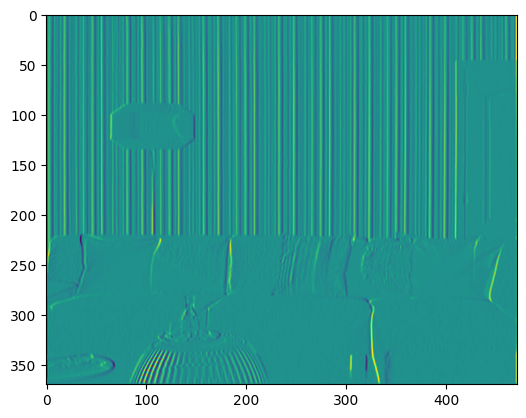

In [47]:
plt.imshow(shape_vertical)

In [48]:
shape_vertical_final = shape_vertical.astype(np.uint8) ## convert in to astype int bcoz i have dealt umpy array in integers values may be negatives and positives  or values can be bigger than 255

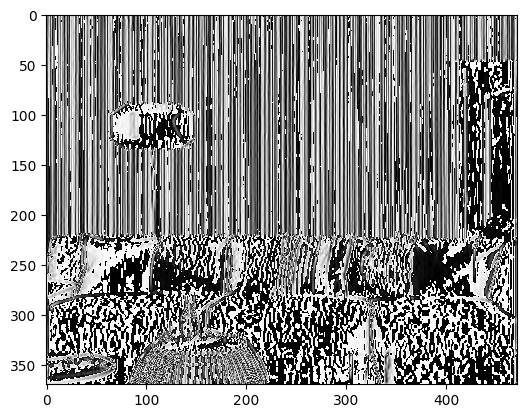

In [83]:
plt.imshow(shape_vertical_final,cmap='gray')

In [50]:
cv2.imshow(" shape",shape_vertical_final)
cv2.waitKey(0)                                                     
cv2.destroyAllWindows()

In [92]:
cv2.imwrite(r"images\house vertical filter.jpg",shape_vertical_final)

True

In [53]:
h = shapehouse_bw.shape[0]
w = shapehouse_bw.shape[1]

i=0
j=0

shape_horizontal_fltr = []

while i<h-2: 
    t=[]
    j=0
    while j<w-2:                  ## no padding 
        t.append(np.multiply(shapehouse_bw[i:i+3,j:j+3],horizontal_fltr).sum())
        j+=1
        
    shape_horizontal_fltr.append(t)
    i+=1
       
shape_horizontal = np.array(shape_horizontal_fltr)

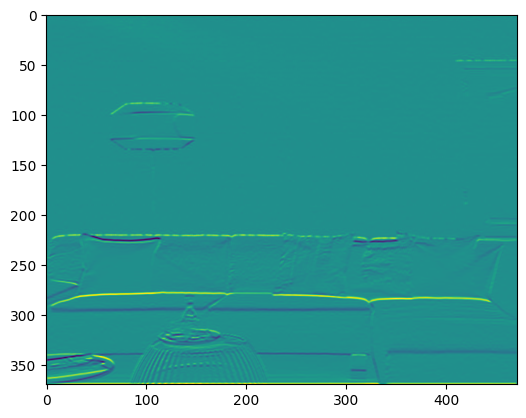

In [54]:
plt.imshow(shape_horizontal)

In [55]:
shape_horizontal_final = shape_horizontal.astype(np.uint8)

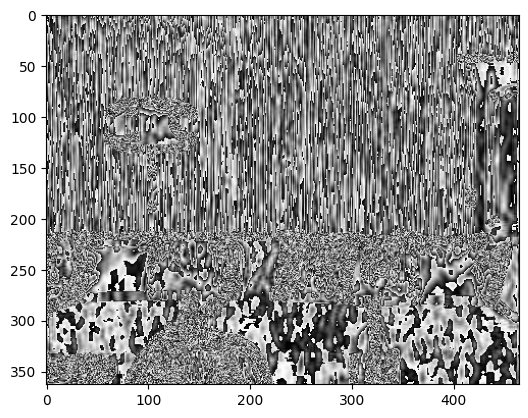

In [84]:
plt.imshow(shape_horizontal_final,cmap='gray')

In [57]:
cv2.imshow(" shape",shape_horizontal_final)
cv2.waitKey(0)                                                     
cv2.destroyAllWindows()

In [93]:
cv2.imwrite(r"images\house horizontal filter.jpg",shape_horizontal_final)

True

In [86]:
vertical_result = cv2.filter2D(shapehouse_bw,-1,vertical_fltr)
horizontal_result = cv2.filter2D(shapehouse_bw,-1,horizontal_fltr)

combine_result = np.abs(vertical_result)+np.abs(horizontal_result)

cv2.imshow(" shape",combine_result)
cv2.waitKey(0)                                                     
cv2.destroyAllWindows()   ## abs =to minimize the noises in horizontal filter and vertical filter

In [94]:
cv2.imwrite(r"images\shape horizontal vertical 3 x3 filter.jpg",combine_result)

True

## fltr1 = np.tile(np.array([-1, -1, -1, -1, 0, 1, 1, 1, 1]), (9, 1))
## fltr2 = fltr.transpose()


In [59]:
fltr1 = np.tile(np.array([-1,-1,-1,-1,0,1,1,1,1]),(9,1))
fltr2 = fltr1.transpose()


In [62]:
fltr1

array([[-1, -1, -1, -1,  0,  1,  1,  1,  1],
       [-1, -1, -1, -1,  0,  1,  1,  1,  1],
       [-1, -1, -1, -1,  0,  1,  1,  1,  1],
       [-1, -1, -1, -1,  0,  1,  1,  1,  1],
       [-1, -1, -1, -1,  0,  1,  1,  1,  1],
       [-1, -1, -1, -1,  0,  1,  1,  1,  1],
       [-1, -1, -1, -1,  0,  1,  1,  1,  1],
       [-1, -1, -1, -1,  0,  1,  1,  1,  1],
       [-1, -1, -1, -1,  0,  1,  1,  1,  1]])

In [74]:
h = shapehouse_bw.shape[0]
w = shapehouse_bw.shape[1]

i=0
j=0

shape_fltr1 = []


while i<h-9: 
    t=[]
    j=0
    while j<w-9:                  ## no padding 
        t.append(np.multiply(shapehouse_bw[i:i+9,j:j+9],fltr1).sum())
        
        j+=1
        
    shape_fltr1.append(t)
    i+=1
       
shape_fltr1 = np.array(shape_fltr1)

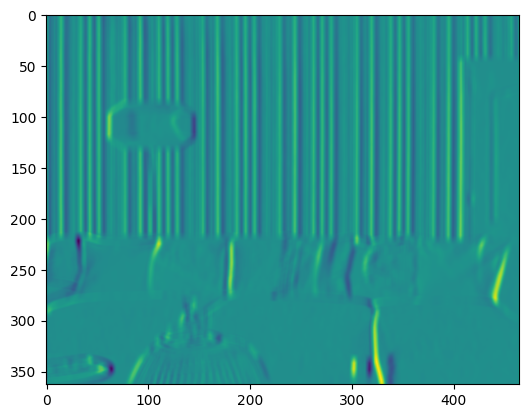

In [95]:
plt.imshow(shape_fltr1)

In [96]:
shape_fltr1_final = shape_fltr1.astype(np.uint8)

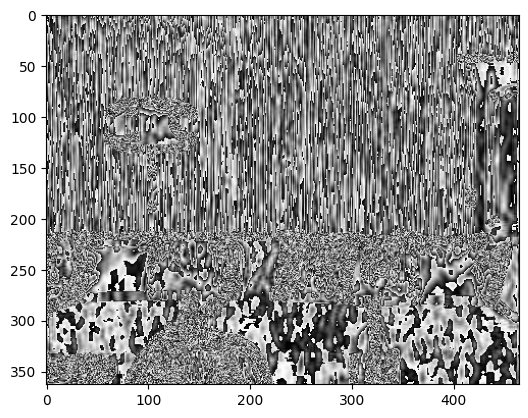

In [98]:
plt.imshow(shape_fltr1_final,cmap='gray')

In [99]:
cv2.imwrite(r"images\house vertical 9 x 9 filter.jpg",shape_fltr1_final)

True

In [100]:
h = shapehouse_bw.shape[0]
w = shapehouse_bw.shape[1]

i=0
j=0

shape_fltr2 = []

while i<h-9: 
    t=[]
    j=0
    while j<w-9:                  ## no padding 
        t.append(np.multiply(shapehouse_bw[i:i+9,j:j+9],fltr2).sum())
        j+=1
        
    shape_fltr2.append(t)
    i+=1
       
shape_fltr2 = np.array(shape_fltr2)

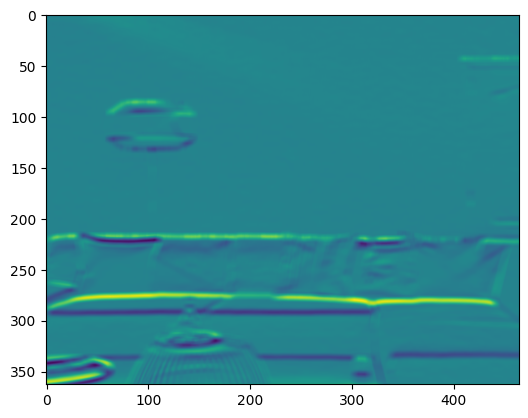

In [101]:
plt.imshow(shape_fltr2)

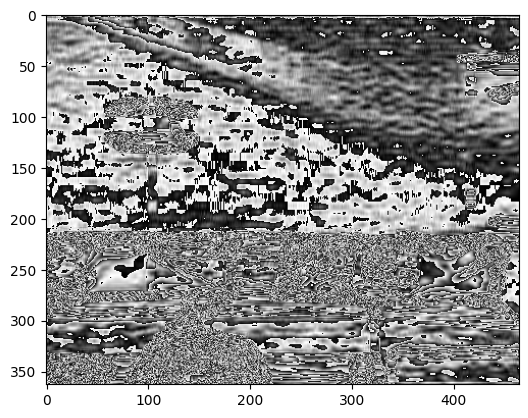

In [102]:
shape_fltr2 = shape_fltr2.astype(np.uint8)
plt.imshow(shape_fltr2,cmap='gray')

In [103]:
cv2.imwrite(r"images\house horizontal 9 x 9 filter.jpg",shape_fltr2)

True

In [104]:
vertical_result = cv2.filter2D(shapehouse_bw,-1,fltr2)
horizontal_result = cv2.filter2D(shapehouse_bw,-1,fltr1)

combine_result = np.abs(vertical_result)+np.abs(horizontal_result)

cv2.imshow(" shape",combine_result)
cv2.waitKey(0)                                                     
cv2.destroyAllWindows()   ## abs =to minimize the noises in horizontal filter and vertical filter

In [109]:
cv2.imwrite(r"images\house horizontal vertical 9x9 house filter.jpg",combine_result) 

True